In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('husl')

In [3]:
iris = pd.read_csv('iris.csv')

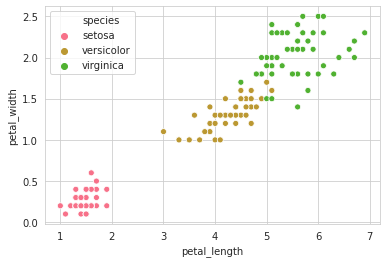

In [4]:
sns.scatterplot(data=iris,
               x='petal_length',
               y='petal_width',
               hue='species')

In [5]:
x = iris[['petal_length','petal_width']]

## Cluster Jerárquico

In [6]:
from scipy.cluster import hierarchy

In [7]:
iris20 = x.sample(20)

In [27]:
Z = hierarchy.linkage(iris.drop('species', axis=1),'ward')

In [18]:
iris20

,petal_length,petal_width
100,6.0,2.5
103,5.6,1.8
36,1.3,0.2
124,5.7,2.1
133,5.1,1.5
41,1.3,0.3
120,5.7,2.3
70,4.8,1.8
53,4.0,1.3
74,4.3,1.3


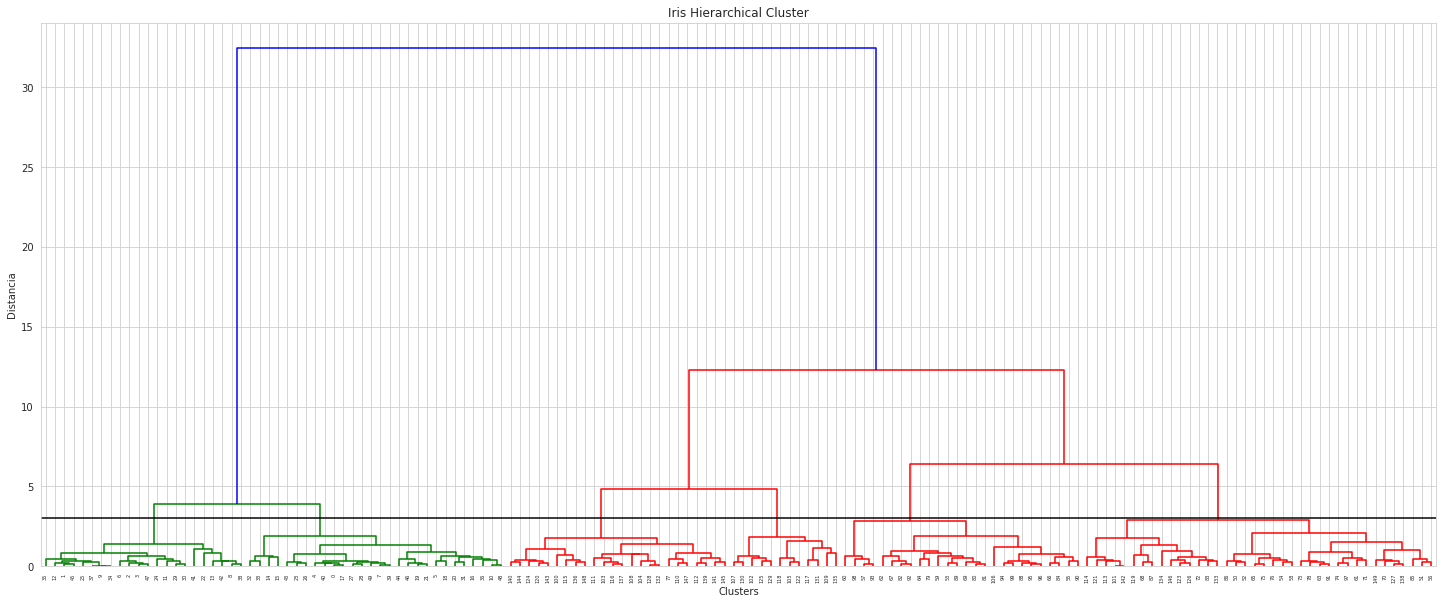

In [28]:
plt.figure(figsize=(25,10))
plt.title('Iris Hierarchical Cluster')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
hierarchy.dendrogram(
    Z, 
    leaf_rotation=90
)
plt.axhline(y=3, c='k')
plt.show()

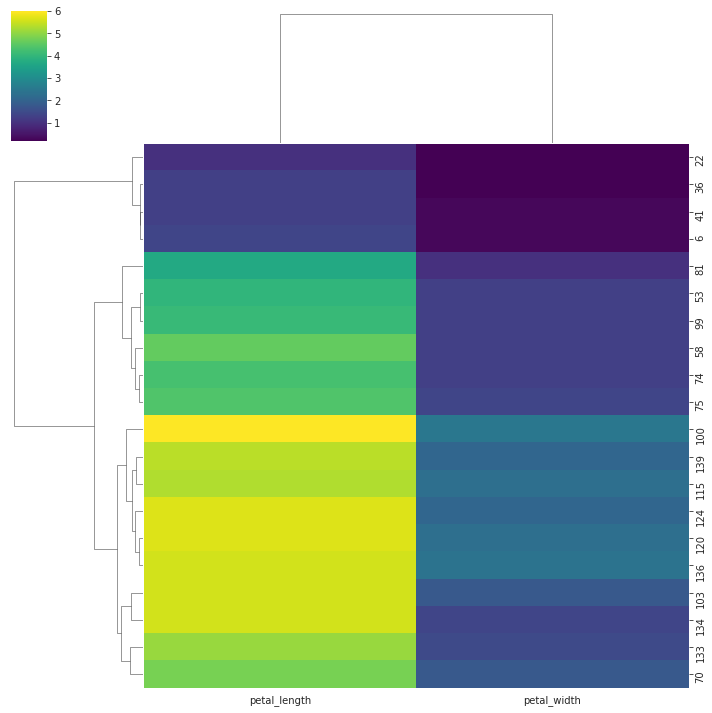

In [21]:
sns.clustermap(iris20, cmap='viridis')

In [31]:
from sklearn.cluster import AgglomerativeClustering 

In [42]:
hCluster = AgglomerativeClustering(n_clusters=2,
                                  affinity='euclidean',
                                  linkage='ward')
hCluster.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

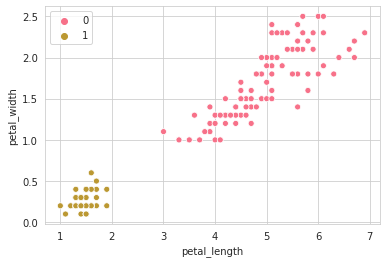

In [43]:
sns.scatterplot(data=x,
                x='petal_length',
                y='petal_width',
                hue=hCluster.labels_)

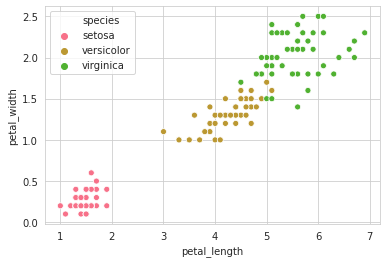

In [39]:
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species')

# Kmeans

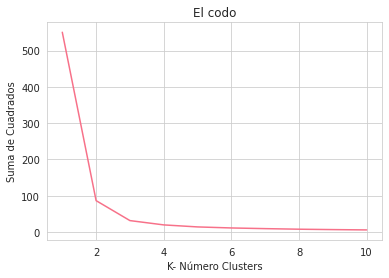

In [46]:
from sklearn.cluster import KMeans

ss=[]

for k in range(1,11):
    kmeansTest = KMeans(n_clusters = k)
    kmeansTest.fit(x)
    ss.append(kmeansTest.inertia_)
    
plt.plot(range(1,11),ss)
plt.title('El codo')
plt.xlabel('K- Número Clusters')
plt.ylabel('Suma de Cuadrados')
plt.show()

In [61]:
KM = KMeans(n_clusters=3)
KMeanlabels = KM.fit_predict(x)

In [57]:
KMeanlabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

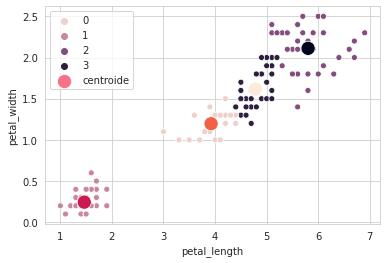

In [63]:
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue=KMeanlabels)
sns.scatterplot(x=KM.cluster_centers_[:,0],
                y=KM.cluster_centers_[:,1],
                s=200,
                label='centroide')

In [66]:
KMeanTodos = KMeans(n_clusters=3)
KMeanlabels = KMeanTodos.fit_predict(iris.drop('species', axis=1))

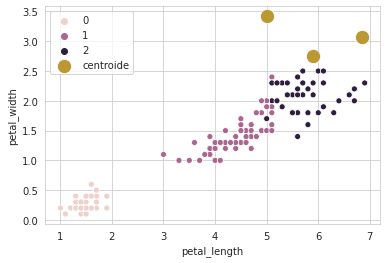

In [65]:
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue=KMeanlabels)
sns.scatterplot(x=KMeanTodos.cluster_centers_[:,0],
                y=KMeanTodos.cluster_centers_[:,1],
                s=200,
                label='centroide')

In [67]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [71]:
xP = StandardScaler().fit_transform(iris.drop('species', axis=1))

In [75]:
pd.DataFrame(xP).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [76]:
pca = PCA(n_components = 3)
components = pca.fit(xP)

In [77]:
pca.n_components_

3

([<matplotlib.axis.XTick at 0x7f88bf6718d0>,
 <a list of 3 Text major ticklabel objects>)

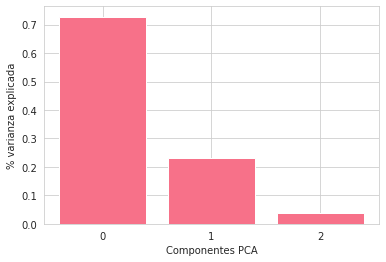

In [79]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('Componentes PCA')
plt.ylabel('% varianza explicada')
plt.xticks(range(pca.n_components_))

In [80]:
diet = pd.read_csv('diet.csv')

In [81]:
diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [82]:
dietpca = diet.fillna(10)

In [83]:
diet2 = StandardScaler().fit_transform(dietpca.drop('SEQN', axis=1))

In [89]:
pca = PCA(n_components = 10)
pcaA = pca.fit(diet2)

([<matplotlib.axis.XTick at 0x7f88b867b240>,
 <a list of 10 Text major ticklabel objects>)

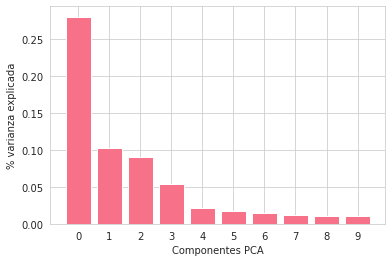

In [90]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xlabel('Componentes PCA')
plt.ylabel('% varianza explicada')
plt.xticks(range(pca.n_components_))

In [91]:
pcaA.components_

array([[ 0.05397512,  0.04083992, -0.12601024, ..., -0.10579294,
        -0.01738928, -0.10584354],
       [ 0.01808728,  0.01089476, -0.0932961 , ...,  0.15542059,
         0.0248215 ,  0.15551807],
       [ 0.00335005,  0.00418797,  0.06992655, ...,  0.00562525,
         0.00126875,  0.00563084],
       ...,
       [ 0.13256359,  0.11970071, -0.01770991, ...,  0.01115314,
         0.05210756,  0.00934029],
       [-0.4271955 , -0.43110495, -0.00605014, ..., -0.00227075,
        -0.10554068,  0.00248327],
       [-0.04307149, -0.03731143,  0.00419958, ...,  0.00448609,
        -0.02548073,  0.00556842]])

In [96]:
PCA_components = pd.DataFrame(pcaA.components_).transpose()

In [97]:
PCA_components

,0,1,2,3,4,5,6,7,8,9
0,0.053975,0.018087,0.003350,0.006362,0.037473,-0.113295,-0.245714,0.132564,-0.427195,-0.043071
1,0.040840,0.010895,0.004188,0.008531,0.036337,-0.097570,-0.218624,0.119701,-0.431105,-0.037311
2,-0.126010,-0.093296,0.069927,0.005503,0.007086,-0.027850,-0.008207,-0.017710,-0.006050,0.004200
3,0.055149,0.046191,-0.036960,0.003271,-0.006346,0.029131,0.015427,0.048164,0.020059,0.001738
4,-0.121018,-0.094706,0.068932,0.006428,0.004868,-0.025332,0.002124,-0.035526,0.015592,0.010577
...,...,...,...,...,...,...,...,...,...,...
162,-0.105666,0.155632,0.005321,0.087671,0.008532,-0.014470,-0.008784,0.010273,-0.003098,0.005427
163,-0.037727,0.060119,-0.001003,0.017864,-0.002495,-0.008707,-0.007587,0.017006,-0.050526,-0.002925
164,-0.105793,0.155421,0.005625,0.089308,0.009074,-0.014396,-0.010066,0.011153,-0.002271,0.004486
165,-0.017389,0.024822,0.001269,0.016477,-0.012115,-0.000816,-0.030476,0.052108,-0.105541,-0.025481


Text(0, 0.5, 'PCA 2')

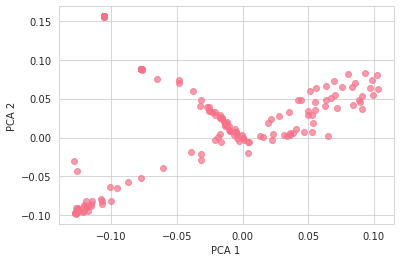

In [98]:
plt.scatter(PCA_components[0],PCA_components[1],alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [99]:
PCA_components.iloc[:,0:2]

,0,1
0,0.053975,0.018087
1,0.040840,0.010895
2,-0.126010,-0.093296
3,0.055149,0.046191
4,-0.121018,-0.094706
...,...,...
162,-0.105666,0.155632
163,-0.037727,0.060119
164,-0.105793,0.155421
165,-0.017389,0.024822


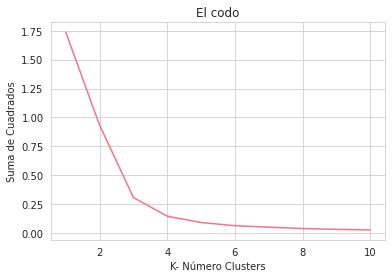

In [100]:
from sklearn.cluster import KMeans

ss=[]

for k in range(1,11):
    kmeansTest = KMeans(n_clusters = k)
    kmeansTest.fit(PCA_components.iloc[:,0:2])
    ss.append(kmeansTest.inertia_)
    
plt.plot(range(1,11),ss)
plt.title('El codo')
plt.xlabel('K- Número Clusters')
plt.ylabel('Suma de Cuadrados')
plt.show()

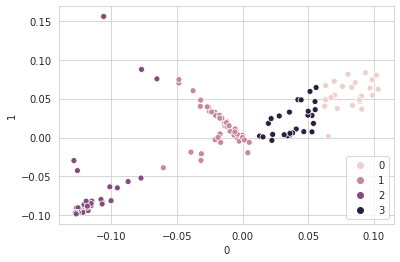

In [106]:
kmeansPCA = KMeans(n_clusters = 4)
labelsPCA = kmeansPCA.fit_predict(PCA_components.iloc[:,0:1])
    
sns.scatterplot(x=PCA_components.iloc[:,0],
                    y=PCA_components.iloc[:,1],
                   hue=labelsPCA)

# KNNClassifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train,y_test = train_test_split(iris.drop('species', axis=1),
                                                    iris['species'],
                                                    test_size=0.20
)

In [110]:
y_test

57     versicolor
60     versicolor
137     virginica
117     virginica
4          setosa
79     versicolor
88     versicolor
86     versicolor
39         setosa
13         setosa
11         setosa
84     versicolor
45         setosa
15         setosa
96     versicolor
30         setosa
10         setosa
21         setosa
33         setosa
106     virginica
80     versicolor
51     versicolor
119     virginica
0          setosa
26         setosa
72     versicolor
24         setosa
58     versicolor
103     virginica
46         setosa
Name: species, dtype: object

In [115]:
knnC = KNeighborsClassifier(n_neighbors=5)
knnC.fit(X_train, y_train)
knnResults = knnC.predict(X_test)

In [116]:
knnResults

array(['virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor'], dtype=object)

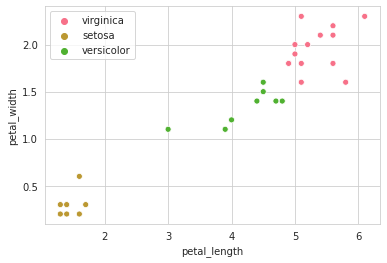

In [117]:
sns.scatterplot(x=X_test['petal_length'],
                y=X_test['petal_width'],
                hue=knnResults)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knnResults))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.89      0.94         9
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [121]:
def numeros(x):
    if x == 'virginica':
        return 0
    elif x =='setosa':
        return 1
    elif x == 'versicolor':
        return 2
    else: 
        return 'NA'

In [122]:
def etiquetas(x):
    if x == 0:
        return 'virginica'
    elif x == 1:
        return 'setosa'
    elif x == 2:
        return 'versicolor'
    else: 
        return 'NA'

In [126]:
neighbors = np.arange(1,11)
results = np.zeros([len(y_test),len(neighbors)])
error = []

for i, k in enumerate(neighbors):
    knnCTest = KNeighborsClassifier(n_neighbors=k)
    knnCTest.fit(X_train, y_train.apply(numeros))
    results[:,1] = knnCTest.predict(X_test)
    error.append(np.mean(results[:,i] != y_test.apply(numeros)))

In [127]:
pd.DataFrame(results)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
ks = pd.DataFrame(results).applymap(etiquetas)
irisk = y_test

In [129]:
iriskl = pd.concat([irisk,ks], axis=1)

In [130]:
iriskl

,species,0,1,2,3,4,5,6,7,8,9
0,NaN,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
1,NaN,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
2,NaN,virginica,setosa,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
3,NaN,virginica,versicolor,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
4,NaN,virginica,versicolor,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
5,NaN,virginica,versicolor,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
6,setosa,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
7,NaN,virginica,versicolor,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
8,NaN,virginica,setosa,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
9,NaN,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [133]:
df = iriskl.melt()

In [135]:
df.groupby('value')['variable'].value_counts() 

value       variable
setosa      1            8
            species      8
versicolor  species      9
            1            8
virginica   0           30
            2           30
            3           30
            4           30
            5           30
            6           30
            7           30
            8           30
            9           30
            1           14
            species     13
Name: variable, dtype: int64

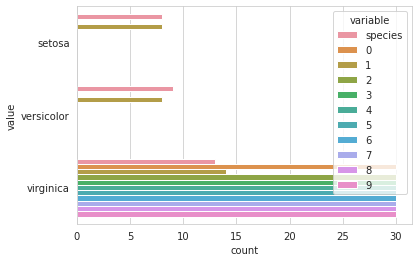

In [136]:
sns.countplot(data=df,
             y='value',
             hue='variable')

Text(0.5, 0, 'K Vecinos')

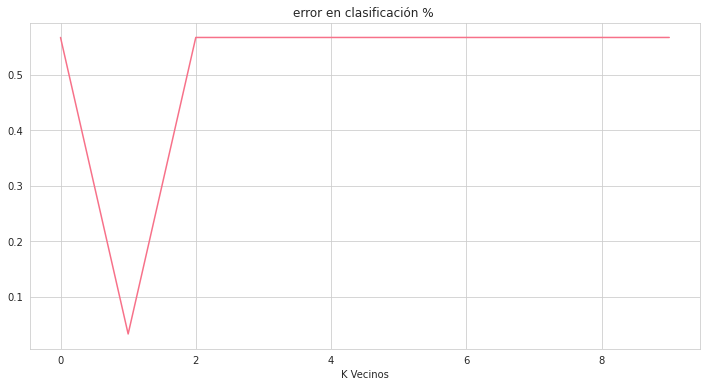

In [137]:
plt.figure(figsize=(12,6))
plt.plot(error)
plt.title('error en clasificación % ')
plt.xlabel('K Vecinos')

# Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [141]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

logRegResults = logreg.predict(X_test)

print('Matriz de confusión', confusion_matrix(y_test,logRegResults))
print('Matriz de confusión', classification_report(y_test,logRegResults))

Matriz de confusión [[ 8  0  0]
 [ 0  8  1]
 [ 0  0 13]]
Matriz de confusión               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.89      0.94         9
   virginica       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification 

bX, class_label = make_classification(n_samples=1000,
                                     n_classes=2,
                                     weights=[1,1],
                                     random_state=1)



In [145]:
bX_train, bX_test, by_train,by_test = train_test_split(bX,
                                                    class_label,
                                                    test_size=0.20)

In [146]:
logreg.fit(bX_train,by_train)
logRegProbs = logreg.predict_proba(bX_test)
logRegProbs = logRegProbs[:,1]

auc = roc_auc_score(by_test,logRegProbs)

In [147]:
auc

0.9274355877616747

In [150]:
fpr, tpr, tresholds = roc_curve(by_test,logRegProbs)

Text(0.5, 1.0, 'ROC Curve')

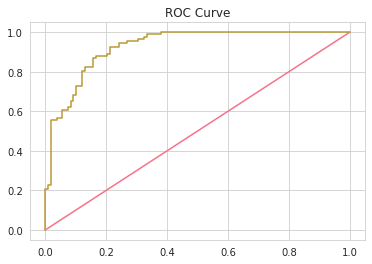

In [153]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title('ROC Curve')


In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

logRegCv = Pipeline([('scaler', StandardScaler()),
                     ('logRegCv', LogisticRegression())
    
])


In [157]:
scores = cross_val_score(estimator = logRegCv,
                         scoring = 'accuracy',
                         X=X_train,
                         y=y_train,
                         cv=10)

In [159]:
print('Media', scores.mean())
print('Std', scores.std())

Media 0.95
Std 0.05527707983925667


In [160]:
from sklearn.ensemble import RandomForestClassifier

randomCv = RandomForestClassifier(n_estimators=300,random_state=1)

scores = cross_val_score(estimator = randomCv,
                         scoring = 'accuracy',
                         X=X_train,
                         y=y_train,
                         cv=10)

print('Media', scores.mean())
print('Std', scores.std())

Media 0.9583333333333333
Std 0.04166666666666669


In [161]:
grid_param = {
    'n_estimators': [10,30,50,80,100],
    'criterion': ['gini','entropy']
    }

In [162]:
gridSearch = GridSearchCV(estimator=randomCv,
                         param_grid=grid_param,
                         scoring='accuracy',
                         cv=2)

gridSearch.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(n_estimators=300, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 30, 50, 80, 100]},
             scoring='accuracy')

In [163]:
gridSearch.best_params_

{'criterion': 'gini', 'n_estimators': 80}

In [164]:
gridSearch.best_score_

0.95